#Задача:
ДЗ - в рамках ранее выполненной работы по обработке данных, выполнить все работы 
с пандас дата фреймом через SQL запросы. 
- разбить выборку на обучающую и тестовую
- проанализировать пропуски и решить, что с ними делать
- проанализировать выбросы
- создать/ удалить переменные
- закодировать категориальные переменные
- нормализовать числовые переменные (при необходимости)

credit_train.csv

In [ ]:
import pandas as pd
import numpy as np

In [2]:
if con:
    con.commit()
    con.close()

NameError: name 'con' is not defined

In [183]:
#NEW
import sqlite3
con = sqlite3.connect('db') #соединяемся с виртуальной базой db 


In [184]:
# Задаем некоторые опции библиотеки pandas, которые 
# настраивают вывод
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 80)

In [3]:
# Прочитаем файл данных
df = pd.read_csv("./credit_train.csv", encoding='ANSI', on_bad_lines = 'skip', sep=';')
df


,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.60,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.10,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.10,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.10,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.10,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,РЕСПУБЛИКА ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТ-ПЕТЕРБУРГ Г,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ КРАЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ ОБЛ,31000.0,2.0,0.0,0


In [186]:
#NEW Сохраним df в sql
df.to_sql('credit_train',con,index=False,if_exists='replace')
con.commit()

In [187]:
#NEW
def select(sql):
  return pd.read_sql(sql,con)


In [188]:
#NEW вывод SQL
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,None,UMN,"59998,00",10,1.60,None,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.10,None,None,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.10,None,None,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,None,SPC,"12009,09",12,1.10,None,None,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,None,SPC,None,10,1.10,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,РЕСПУБЛИКА ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТ-ПЕТЕРБУРГ Г,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ КРАЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ ОБЛ,31000.0,2.0,0.0,0


In [189]:
# Изменим тип графы living_region на str для дальнейшей обработки данных
df["living_region"] = df["living_region"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170746 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [190]:
# NEW Проверим тип данных в SQL(Не понятно почему везде пишет 0)
select('''PRAGMA table_info('credit_train');''')

,cid,name,type,notnull,dflt_value,pk
0,0,client_id,INTEGER,0,None,0
1,1,gender,TEXT,0,None,0
2,2,age,REAL,0,None,0
3,3,marital_status,TEXT,0,None,0
4,4,job_position,TEXT,0,None,0
5,5,credit_sum,TEXT,0,None,0
6,6,credit_month,INTEGER,0,None,0
7,7,tariff_id,REAL,0,None,0
8,8,score_shk,TEXT,0,None,0
9,9,education,TEXT,0,None,0


In [191]:
# Напишем метод очистки данных от мусорных слов и символов
def clear_data(val):
          if val is None:
              return None
          new_val = val.replace(" Г", "").replace(".", "").replace("/", "").replace("(", "").replace(")", "")
          new_val = new_val.replace("АВТОНОМНЫЙ ОКРУГ - ЮГРА", "").replace("АВТОНОМНЫЙ ОКРУГ - Ю", "").replace("АО", "").replace("РЕСПУБЛИКА", "").replace("РЕСП", "").replace("ОБЛАСТЬ", "").replace("ОБЛ", "").replace("КРАЙ", "").replace("САХА", "")
          new_val = new_val.replace(" ", "").replace("-", "")
          return str(new_val)

In [192]:
# Применим метод очистки данных ко всей графе living_region
df["living_region"] = df["living_region"].apply(clear_data)
df = df.astype({'gender' : 'category', 'marital_status' : 'category', 'job_position' : 'category', 'education' : 'category', 'living_region' : 'category',})
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.60,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.10,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.10,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.10,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.10,"0,421385",SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [193]:
# NEW Применим метод очистки к SQL (Выводит ошибку, но функция отрабатывает)
con.create_function("clear_data", 1, clear_data)
select('''UPDATE credit_train 
        SET living_region = clear_data("living_region");''')

TypeError: 'NoneType' object is not iterable

In [194]:
#NEW
con.commit()

In [195]:
#NEW вывод отредактированной SQL-таблицы
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,None,UMN,"59998,00",10,1.60,None,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.10,None,None,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.10,None,None,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,None,SPC,"12009,09",12,1.10,None,None,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,None,SPC,None,10,1.10,"0,421385",SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [196]:
# Удалим пропуски
df = df.dropna()
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,8,F,26.0,UNM,SPC,"47878,00",10,1.10,"0,512525",GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
9,10,F,32.0,UNM,SPC,"26268,00",10,1.10,"0,465026",GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
10,11,M,26.0,MAR,SPC,"16793,00",14,1.00,"0,445430",SCH,САНКТПЕТЕРБУРГ,36000.0,2.0,0.0,0
12,13,M,37.0,MAR,SPC,"42289,00",10,1.60,"0,691609",SCH,АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
13,14,M,43.0,MAR,INP,"57567,00",10,1.10,"0,341164",GRD,ХАНТЫМАНСИЙСКИЙ,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [197]:
#NEW Удалим пропуски SQL(Снова выдает ошибку, но отрабатывает)
select('''DELETE FROM credit_train
            WHERE client_id IS NULL
            OR gender IS NULL
            OR age IS NULL
            OR marital_status IS NULL
            OR job_position IS NULL
            OR credit_sum IS NULL
            OR credit_month IS NULL
            OR tariff_id IS NULL
            OR score_shk IS NULL
            OR education IS NULL
            OR living_region IS NULL
            OR monthly_income IS NULL
            OR credit_count IS NULL
            OR overdue_credit_count IS NULL
            OR open_account_flg IS NULL;''')

TypeError: 'NoneType' object is not iterable

In [198]:
#NEW
con.commit()

In [199]:
#NEW
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,8,F,26.0,UNM,SPC,"47878,00",10,1.10,"0,512525",GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
1,10,F,32.0,UNM,SPC,"26268,00",10,1.10,"0,465026",GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
2,11,M,26.0,MAR,SPC,"16793,00",14,1.00,"0,445430",SCH,САНКТПЕТЕРБУРГ,36000.0,2.0,0.0,0
3,13,M,37.0,MAR,SPC,"42289,00",10,1.60,"0,691609",SCH,АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
4,14,M,43.0,MAR,INP,"57567,00",10,1.10,"0,341164",GRD,ХАНТЫМАНСИЙСКИЙ,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161326,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
161327,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
161328,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
161329,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [200]:
# Заменим буквы на цифры 0 и 1 в графе gender
from sklearn.preprocessing import LabelEncoder
 
labelencoder = LabelEncoder()
 
df.loc[:, 'gender'] = labelencoder.fit_transform(df.loc[:, 'gender'])
df

C:\Users\Rig\AppData\Local\Temp\ipykernel_444\199328924.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 0 0 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, 'gender'] = labelencoder.fit_transform(df.loc[:, 'gender'])


,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,8,0,26.0,UNM,SPC,"47878,00",10,1.10,"0,512525",GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
9,10,0,32.0,UNM,SPC,"26268,00",10,1.10,"0,465026",GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
10,11,1,26.0,MAR,SPC,"16793,00",14,1.00,"0,445430",SCH,САНКТПЕТЕРБУРГ,36000.0,2.0,0.0,0
12,13,1,37.0,MAR,SPC,"42289,00",10,1.60,"0,691609",SCH,АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
13,14,1,43.0,MAR,INP,"57567,00",10,1.10,"0,341164",GRD,ХАНТЫМАНСИЙСКИЙ,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,0,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
170743,170744,0,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
170744,170745,0,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [201]:
#NEW (Снова работает с ошибкой)
select('''UPDATE credit_train
SET gender = CASE
    WHEN gender = 'M' THEN 0
    WHEN gender = 'F' THEN 1
    END;''')

TypeError: 'NoneType' object is not iterable

In [202]:
#NEW
con.commit()

In [203]:
#NEW
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,8,1,26.0,UNM,SPC,"47878,00",10,1.10,"0,512525",GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
1,10,1,32.0,UNM,SPC,"26268,00",10,1.10,"0,465026",GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
2,11,0,26.0,MAR,SPC,"16793,00",14,1.00,"0,445430",SCH,САНКТПЕТЕРБУРГ,36000.0,2.0,0.0,0
3,13,0,37.0,MAR,SPC,"42289,00",10,1.60,"0,691609",SCH,АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
4,14,0,43.0,MAR,INP,"57567,00",10,1.10,"0,341164",GRD,ХАНТЫМАНСИЙСКИЙ,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161326,170742,1,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
161327,170743,1,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
161328,170744,1,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
161329,170745,1,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [204]:
# Заменим буквенные статусы в графее marital_status на цифры в соответствии с иерархией

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [['UNM', 'MAR', 'DIV', 'CIV', 'WID']])
# используем метод .to_frame() для преобразования Series в датафрейм
df.loc[:, 'marital_status'] = ord_enc.fit_transform(df.loc[:, 'marital_status'].to_frame())
df

C:\Users\Rig\AppData\Local\Temp\ipykernel_444\1026937120.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 1. ... 0. 2. 1.]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, 'marital_status'] = ord_enc.fit_transform(df.loc[:, 'marital_status'].to_frame())


,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,8,0,26.0,0.0,SPC,"47878,00",10,1.10,"0,512525",GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
9,10,0,32.0,0.0,SPC,"26268,00",10,1.10,"0,465026",GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
10,11,1,26.0,1.0,SPC,"16793,00",14,1.00,"0,445430",SCH,САНКТПЕТЕРБУРГ,36000.0,2.0,0.0,0
12,13,1,37.0,1.0,SPC,"42289,00",10,1.60,"0,691609",SCH,АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
13,14,1,43.0,1.0,INP,"57567,00",10,1.10,"0,341164",GRD,ХАНТЫМАНСИЙСКИЙ,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,0.0,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,0,24.0,1.0,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
170743,170744,0,31.0,0.0,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
170744,170745,0,53.0,2.0,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [205]:
#NEW
select('''UPDATE credit_train
SET marital_status = CASE
    WHEN marital_status = 'UNM' THEN 0
    WHEN marital_status = 'MAR' THEN 1
    WHEN marital_status = 'DIV' THEN 2
    WHEN marital_status = 'CIV' THEN 3
    WHEN marital_status = 'WID' THEN 4
END;''')

TypeError: 'NoneType' object is not iterable

In [206]:
#NEW
con.commit()

In [207]:
#NEW
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,8,1,26.0,0,SPC,"47878,00",10,1.10,"0,512525",GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
1,10,1,32.0,0,SPC,"26268,00",10,1.10,"0,465026",GRD,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
2,11,0,26.0,1,SPC,"16793,00",14,1.00,"0,445430",SCH,САНКТПЕТЕРБУРГ,36000.0,2.0,0.0,0
3,13,0,37.0,1,SPC,"42289,00",10,1.60,"0,691609",SCH,АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
4,14,0,43.0,1,INP,"57567,00",10,1.10,"0,341164",GRD,ХАНТЫМАНСИЙСКИЙ,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161326,170742,1,27.0,0,SPC,"64867,00",12,1.10,"0,535257",GRD,ТАТАРСТАН,40000.0,6.0,0.0,0
161327,170743,1,24.0,1,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
161328,170744,1,31.0,0,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
161329,170745,1,53.0,2,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [208]:
# Заменим буквенные данные в остальных графае на цифры
encoder = OrdinalEncoder()
df.loc[:, ['job_position', 'education', 'living_region']] = encoder.fit_transform(df.loc[:, ['job_position', 'education', 'living_region']])
df

C:\Users\Rig\AppData\Local\Temp\ipykernel_444\1315092265.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12. 12. 12. ... 12.  8. 12.]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, ['job_position', 'education', 'living_region']] = encoder.fit_transform(df.loc[:, ['job_position', 'education', 'living_region']])
C:\Users\Rig\AppData\Local\Temp\ipykernel_444\1315092265.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 3. ... 1. 3. 1.]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, ['job_position', 'education', 'living_region']] = encoder.fit_transform(df.loc[:, ['job_position', 'education', 'living_region']])
C:\Users\Rig\AppData\Local\Temp\ipykernel_444\1315092265.py:3: FutureWarning: Setting an item of incompatible dtype 

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,8,0,26.0,0.0,12.0,"47878,00",10,1.10,"0,512525",1.0,55.0,60000.0,3.0,0.0,0
9,10,0,32.0,0.0,12.0,"26268,00",10,1.10,"0,465026",1.0,82.0,39500.0,7.0,0.0,0
10,11,1,26.0,1.0,12.0,"16793,00",14,1.00,"0,445430",3.0,76.0,36000.0,2.0,0.0,0
12,13,1,37.0,1.0,12.0,"42289,00",10,1.60,"0,691609",3.0,8.0,70000.0,1.0,0.0,0
13,14,1,43.0,1.0,5.0,"57567,00",10,1.10,"0,341164",1.0,94.0,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,0.0,12.0,"64867,00",12,1.10,"0,535257",1.0,84.0,40000.0,6.0,0.0,0
170742,170743,0,24.0,1.0,12.0,"17640,00",6,1.60,"0,573287",3.0,76.0,30000.0,1.0,0.0,0
170743,170744,0,31.0,0.0,12.0,"27556,47",10,1.32,"0,416098",1.0,70.0,40000.0,1.0,0.0,0
170744,170745,0,53.0,2.0,8.0,"6189,00",12,1.10,"0,482595",3.0,66.0,31000.0,2.0,0.0,0


In [209]:
#NEW Вывод уникальных значений job_position
select('''SELECT DISTINCT job_position FROM credit_train''')

,job_position
0,SPC
1,INP
2,UMN
3,DIR
4,ATP
5,PNA
6,BIS
7,WOI
8,NOR
9,WRK


In [210]:
#NEW Вывод уникальных значений education
select('''SELECT DISTINCT education FROM credit_train''')

,education
0,GRD
1,SCH
2,UGR
3,PGR
4,ACD


In [211]:
#NEW Вывод уникальных значений living_region
select('''SELECT DISTINCT living_region FROM credit_train''')

,living_region
0,МОСКОВСКАЯ
1,СТАВРОПОЛЬСКИЙ
2,САНКТПЕТЕРБУРГ
3,АРХАНГЕЛЬСКАЯ
4,ХАНТЫМАНСИЙСКИЙ
...,...
100,ГУСЬХРУСТАЛЬНЫЙРН
101,БРЯНСКИЙ
102,ОРЁЛ
103,БЛЕВРЕЙСКАЯ


In [212]:
#NEW Заменим буквенные данные в остальных графае на цифры
select('''UPDATE credit_train
SET job_position = CASE
    WHEN job_position = 'SPC' THEN 0
    WHEN job_position = 'INP' THEN 1
    WHEN job_position = 'UMN' THEN 2
    WHEN job_position = 'DIR' THEN 3
    WHEN job_position = 'ATP' THEN 4
    WHEN job_position = 'PNA' THEN 5
    WHEN job_position = 'BIS' THEN 6
    WHEN job_position = 'WOI' THEN 7
    WHEN job_position = 'NOR' THEN 8
    WHEN job_position = 'WRK' THEN 9
    WHEN job_position = 'WRP' THEN 10
    WHEN job_position = 'PNV' THEN 11
    WHEN job_position = 'BIU' THEN 12
    WHEN job_position = 'PNI' THEN 13
    WHEN job_position = 'HSK' THEN 14
    WHEN job_position = 'PNS' THEN 15
    WHEN job_position = 'INV' THEN 16
END,
    education = CASE
    WHEN education = 'GRD' THEN 0
    WHEN education = 'SCH' THEN 1
    WHEN education = 'UGR' THEN 2
    WHEN education = 'PGR' THEN 2
    WHEN education = 'ACD' THEN 2
END;''')

TypeError: 'NoneType' object is not iterable

In [213]:
#NEW
con.commit()

In [214]:
#NEW
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,8,1,26.0,0,0,"47878,00",10,1.10,"0,512525",0,МОСКОВСКАЯ,60000.0,3.0,0.0,0
1,10,1,32.0,0,0,"26268,00",10,1.10,"0,465026",0,СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
2,11,0,26.0,1,0,"16793,00",14,1.00,"0,445430",1,САНКТПЕТЕРБУРГ,36000.0,2.0,0.0,0
3,13,0,37.0,1,0,"42289,00",10,1.60,"0,691609",1,АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
4,14,0,43.0,1,1,"57567,00",10,1.10,"0,341164",0,ХАНТЫМАНСИЙСКИЙ,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161326,170742,1,27.0,0,0,"64867,00",12,1.10,"0,535257",0,ТАТАРСТАН,40000.0,6.0,0.0,0
161327,170743,1,24.0,1,0,"17640,00",6,1.60,"0,573287",1,САНКТПЕТЕРБУРГ,30000.0,1.0,0.0,0
161328,170744,1,31.0,0,0,"27556,47",10,1.32,"0,416098",0,ПРИМОРСКИЙ,40000.0,1.0,0.0,0
161329,170745,1,53.0,2,5,"6189,00",12,1.10,"0,482595",1,ПЕНЗЕНСКАЯ,31000.0,2.0,0.0,0


In [ ]:
#NEW Создадим новую таблицу для сопоставления между текстовыми значениями и числовыми значениями:
select('''CREATE TABLE living_region_mapping (
    original_value TEXT PRIMARY KEY,
    mapped_value INTEGER);''')

In [216]:
#NEW
select('''SELECT * FROM living_region_mapping''')

,living_region,mapped_value
0,МОСКОВСКАЯ,0
1,СТАВРОПОЛЬСКИЙ,1
2,САНКТПЕТЕРБУРГ,2
3,АРХАНГЕЛЬСКАЯ,3
4,ХАНТЫМАНСИЙСКИЙ,4
...,...,...
100,ГУСЬХРУСТАЛЬНЫЙРН,100
101,БРЯНСКИЙ,101
102,ОРЁЛ,102
103,БЛЕВРЕЙСКАЯ,103


In [217]:
#NEW Заменяем в credit_train данные в living_region на числа из living_region_mapping
select('''UPDATE credit_train
SET living_region = (
    SELECT mapped_value
    FROM living_region_mapping
    WHERE living_region_mapping.living_region = credit_train.living_region
);''')

TypeError: 'NoneType' object is not iterable

In [218]:
#NEW
con.commit()

In [219]:
#NEW
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,8,1,26.0,0,0,"47878,00",10,1.10,"0,512525",0,0,60000.0,3.0,0.0,0
1,10,1,32.0,0,0,"26268,00",10,1.10,"0,465026",0,1,39500.0,7.0,0.0,0
2,11,0,26.0,1,0,"16793,00",14,1.00,"0,445430",1,2,36000.0,2.0,0.0,0
3,13,0,37.0,1,0,"42289,00",10,1.60,"0,691609",1,3,70000.0,1.0,0.0,0
4,14,0,43.0,1,1,"57567,00",10,1.10,"0,341164",0,4,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161326,170742,1,27.0,0,0,"64867,00",12,1.10,"0,535257",0,19,40000.0,6.0,0.0,0
161327,170743,1,24.0,1,0,"17640,00",6,1.60,"0,573287",1,2,30000.0,1.0,0.0,0
161328,170744,1,31.0,0,0,"27556,47",10,1.32,"0,416098",0,53,40000.0,1.0,0.0,0
161329,170745,1,53.0,2,5,"6189,00",12,1.10,"0,482595",1,56,31000.0,2.0,0.0,0


In [220]:
# Меняем тип данных с object на float в score_shk и credit_sum
df['score_shk'] = df['score_shk'].replace(',', '.', regex=True)
df['credit_sum'] = df['credit_sum'].replace(',', '.', regex=True)
df["score_shk"] = df["score_shk"].astype(float)
df["credit_sum"] = df["credit_sum"].astype(float)
df

C:\Users\Rig\AppData\Local\Temp\ipykernel_444\2245881118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_shk'] = df['score_shk'].replace(',', '.', regex=True)
C:\Users\Rig\AppData\Local\Temp\ipykernel_444\2245881118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['credit_sum'] = df['credit_sum'].replace(',', '.', regex=True)
C:\Users\Rig\AppData\Local\Temp\ipykernel_444\2245881118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,8,0,26.0,0.0,12.0,47878.00,10,1.10,0.512525,1.0,55.0,60000.0,3.0,0.0,0
9,10,0,32.0,0.0,12.0,26268.00,10,1.10,0.465026,1.0,82.0,39500.0,7.0,0.0,0
10,11,1,26.0,1.0,12.0,16793.00,14,1.00,0.445430,3.0,76.0,36000.0,2.0,0.0,0
12,13,1,37.0,1.0,12.0,42289.00,10,1.60,0.691609,3.0,8.0,70000.0,1.0,0.0,0
13,14,1,43.0,1.0,5.0,57567.00,10,1.10,0.341164,1.0,94.0,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,0.0,12.0,64867.00,12,1.10,0.535257,1.0,84.0,40000.0,6.0,0.0,0
170742,170743,0,24.0,1.0,12.0,17640.00,6,1.60,0.573287,3.0,76.0,30000.0,1.0,0.0,0
170743,170744,0,31.0,0.0,12.0,27556.47,10,1.32,0.416098,1.0,70.0,40000.0,1.0,0.0,0
170744,170745,0,53.0,2.0,8.0,6189.00,12,1.10,0.482595,3.0,66.0,31000.0,2.0,0.0,0


In [221]:
# Проверяем все ли графы числового типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161505 entries, 7 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             161505 non-null  int64  
 1   gender                161505 non-null  int32  
 2   age                   161505 non-null  float64
 3   marital_status        161505 non-null  float64
 4   job_position          161505 non-null  float64
 5   credit_sum            161505 non-null  float64
 6   credit_month          161505 non-null  int64  
 7   tariff_id             161505 non-null  float64
 8   score_shk             161505 non-null  float64
 9   education             161505 non-null  float64
 10  living_region         161505 non-null  float64
 11  monthly_income        161505 non-null  float64
 12  credit_count          161505 non-null  float64
 13  overdue_credit_count  161505 non-null  float64
 14  open_account_flg      161505 non-null  int64  
dtypes: fl

In [222]:
#Выбросы
from scipy import stats

# посмотрим на сколько СКО значение отклоняется от среднего
z = stats.zscore(df)
z

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,-1.732309,-0.958562,-1.061716,-1.132029,0.266016,1.355052,-0.279635,-0.936662,0.389490,-1.120282,-0.115086,0.773259,0.502314,-0.217767,-0.444115
9,-1.732269,-0.958562,-0.484763,-1.132029,0.266016,0.020582,-0.279635,-0.936662,0.000242,-1.120282,0.902240,-0.036217,2.753116,-0.217767,-0.444115
10,-1.732249,1.043229,-1.061716,0.086339,0.266016,-0.564522,0.849496,-1.361071,-0.160345,0.764967,0.676168,-0.174420,-0.060387,-0.217767,-0.444115
12,-1.732208,1.043229,-0.003969,0.086339,0.266016,1.009918,-0.279635,1.185385,1.857062,0.764967,-1.885987,1.168126,-0.623087,-0.217767,-0.444115
13,-1.732188,1.043229,0.572984,0.086339,-2.167476,1.953372,-0.279635,-0.936662,-1.014793,-1.120282,1.354385,0.773259,2.753116,-0.217767,-0.444115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,1.732598,-0.958562,-0.965558,-1.132029,0.266016,2.404164,0.284931,-0.936662,0.575776,-1.120282,0.977598,-0.016473,2.190415,-0.217767,-0.444115
170742,1.732618,-0.958562,-1.254034,0.086339,0.266016,-0.512218,-1.408765,1.185385,0.887428,0.764967,0.676168,-0.411340,-0.623087,-0.217767,-0.444115
170743,1.732638,-0.958562,-0.580922,-1.132029,0.266016,0.100148,-0.279635,-0.002961,-0.400717,-1.120282,0.450095,-0.016473,-0.623087,-0.217767,-0.444115
170744,1.732658,-0.958562,1.534573,1.304708,-1.124551,-1.219345,0.284931,-0.936662,0.144218,0.764967,0.299380,-0.371853,-0.060387,-0.217767,-0.444115


In [223]:
# найдем те значения, которые отклоняются больше, чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1),
# где хотя бы одно значение True (т.е. > 3)
df[(np.abs(z) > 3).any(axis = 1)]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
28,29,0,24.0,0.0,0.0,13579.00,13,1.1,0.546223,3.0,30.0,21000.0,0.0,0.0,0
36,37,0,64.0,4.0,12.0,15798.00,10,1.1,0.492670,3.0,93.0,29000.0,3.0,0.0,0
51,52,0,58.0,4.0,12.0,13287.00,6,1.9,0.434755,3.0,95.0,25000.0,3.0,0.0,0
53,54,1,69.0,2.0,8.0,55900.00,18,1.4,0.389095,1.0,55.0,10000.0,0.0,0.0,0
54,55,1,41.0,1.0,1.0,19275.56,10,1.1,0.497790,3.0,64.0,50000.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170724,170725,1,32.0,1.0,0.0,19876.67,10,1.1,0.319037,3.0,43.0,40000.0,1.0,0.0,0
170726,170727,0,41.0,0.0,12.0,22990.00,10,1.5,0.600966,3.0,15.0,20000.0,3.0,1.0,0
170730,170731,0,53.0,4.0,12.0,28271.59,12,1.1,0.491833,3.0,30.0,32000.0,2.0,0.0,0
170731,170732,1,35.0,1.0,12.0,29630.00,3,1.5,0.236082,1.0,41.0,45000.0,5.0,1.0,0


In [224]:
# если в строке (axis = 1) есть хотя бы один False как следствие условия np.abs(z) < 3,
# метод .all() вернет логический массив, который можно использовать как фильтр
z_mask = (np.abs(z) < 3).all(axis = 1)

df = df[z_mask]
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,8,0,26.0,0.0,12.0,47878.00,10,1.10,0.512525,1.0,55.0,60000.0,3.0,0.0,0
9,10,0,32.0,0.0,12.0,26268.00,10,1.10,0.465026,1.0,82.0,39500.0,7.0,0.0,0
10,11,1,26.0,1.0,12.0,16793.00,14,1.00,0.445430,3.0,76.0,36000.0,2.0,0.0,0
12,13,1,37.0,1.0,12.0,42289.00,10,1.60,0.691609,3.0,8.0,70000.0,1.0,0.0,0
13,14,1,43.0,1.0,5.0,57567.00,10,1.10,0.341164,1.0,94.0,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,0.0,12.0,64867.00,12,1.10,0.535257,1.0,84.0,40000.0,6.0,0.0,0
170742,170743,0,24.0,1.0,12.0,17640.00,6,1.60,0.573287,3.0,76.0,30000.0,1.0,0.0,0
170743,170744,0,31.0,0.0,12.0,27556.47,10,1.32,0.416098,1.0,70.0,40000.0,1.0,0.0,0
170744,170745,0,53.0,2.0,8.0,6189.00,12,1.10,0.482595,3.0,66.0,31000.0,2.0,0.0,0


In [225]:
#NEW Удаляем выбросы
cur = con.cursor()
# Найти Q1 и Q3 вручную
q1_query = """
SELECT age
FROM credit_train
ORDER BY age
LIMIT 1
OFFSET (SELECT COUNT(*) FROM credit_train) / 4;
"""

q3_query = """
SELECT age
FROM credit_train
ORDER BY age
LIMIT 1
OFFSET (SELECT COUNT(*) FROM credit_train) * 3 / 4;
"""

# Выполнение запросов для Q1 и Q3
q1 = cur.execute(q1_query).fetchone()[0]
q3 = cur.execute(q3_query).fetchone()[0]

# Вычисление IQR и границ
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Удаление выбросов
delete_query = f"""
DELETE FROM credit_train
WHERE age < {lower_bound} OR age > {upper_bound};
"""

cur.execute(delete_query)
con.commit()


In [226]:
#NEW
select('''SELECT * FROM credit_train''')

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,8,1,26.0,0,0,"47878,00",10,1.10,"0,512525",0,0,60000.0,3.0,0.0,0
1,10,1,32.0,0,0,"26268,00",10,1.10,"0,465026",0,1,39500.0,7.0,0.0,0
2,11,0,26.0,1,0,"16793,00",14,1.00,"0,445430",1,2,36000.0,2.0,0.0,0
3,13,0,37.0,1,0,"42289,00",10,1.60,"0,691609",1,3,70000.0,1.0,0.0,0
4,14,0,43.0,1,1,"57567,00",10,1.10,"0,341164",0,4,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159561,170742,1,27.0,0,0,"64867,00",12,1.10,"0,535257",0,19,40000.0,6.0,0.0,0
159562,170743,1,24.0,1,0,"17640,00",6,1.60,"0,573287",1,2,30000.0,1.0,0.0,0
159563,170744,1,31.0,0,0,"27556,47",10,1.32,"0,416098",0,53,40000.0,1.0,0.0,0
159564,170745,1,53.0,2,5,"6189,00",12,1.10,"0,482595",1,56,31000.0,2.0,0.0,0


In [227]:
#удалим ненужную графу client_id
df = df.drop(['client_id'], axis=1)
#Очищенная от выбросов итоговая таблица
df

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,0,26.0,0.0,12.0,47878.00,10,1.10,0.512525,1.0,55.0,60000.0,3.0,0.0,0
9,0,32.0,0.0,12.0,26268.00,10,1.10,0.465026,1.0,82.0,39500.0,7.0,0.0,0
10,1,26.0,1.0,12.0,16793.00,14,1.00,0.445430,3.0,76.0,36000.0,2.0,0.0,0
12,1,37.0,1.0,12.0,42289.00,10,1.60,0.691609,3.0,8.0,70000.0,1.0,0.0,0
13,1,43.0,1.0,5.0,57567.00,10,1.10,0.341164,1.0,94.0,60000.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,0,27.0,0.0,12.0,64867.00,12,1.10,0.535257,1.0,84.0,40000.0,6.0,0.0,0
170742,0,24.0,1.0,12.0,17640.00,6,1.60,0.573287,3.0,76.0,30000.0,1.0,0.0,0
170743,0,31.0,0.0,12.0,27556.47,10,1.32,0.416098,1.0,70.0,40000.0,1.0,0.0,0
170744,0,53.0,2.0,8.0,6189.00,12,1.10,0.482595,3.0,66.0,31000.0,2.0,0.0,0


In [228]:
# Масштабируем данные
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1, 1))
df2 = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df2, columns = df.columns)
df_scaled

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,-1.0,-0.68,-1.000000,0.384615,0.258261,-0.222222,-0.791667,0.132031,-0.5,0.047619,-0.009009,-0.142857,-1.0,-1.0
1,-1.0,-0.44,-1.000000,0.384615,-0.344083,-0.222222,-0.791667,0.001769,-0.5,0.561905,-0.378378,1.000000,-1.0,-1.0
2,1.0,-0.68,-0.333333,0.384615,-0.608184,0.222222,-1.000000,-0.051971,0.5,0.447619,-0.441441,-0.428571,-1.0,-1.0
3,1.0,-0.24,-0.333333,0.384615,0.102477,-0.222222,0.250000,0.623152,0.5,-0.847619,0.171171,-0.714286,-1.0,-1.0
4,1.0,0.00,-0.333333,-0.692308,0.528326,-0.222222,-0.791667,-0.337911,-0.5,0.790476,-0.009009,1.000000,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133466,-1.0,-0.64,-1.000000,0.384615,0.731802,0.000000,-0.791667,0.194371,-0.5,0.600000,-0.369369,0.714286,-1.0,-1.0
133467,-1.0,-0.76,-0.333333,0.384615,-0.584575,-0.666667,0.250000,0.298665,0.5,0.447619,-0.549550,-0.714286,-1.0,-1.0
133468,-1.0,-0.48,-1.000000,0.384615,-0.308169,-0.222222,-0.333333,-0.132412,-0.5,0.333333,-0.369369,-0.714286,-1.0,-1.0
133469,-1.0,0.40,0.333333,-0.230769,-0.903753,0.000000,-0.791667,0.049950,0.5,0.257143,-0.531532,-0.428571,-1.0,-1.0


In [232]:
#NEW Масштабирование в SQL

# Подключение к базе данных
con = sqlite3.connect('db')

# Загружаем данные из таблицы в DataFrame
df = pd.read_sql("SELECT * FROM credit_train;", con)

# Выбираем только числовые столбцы для масштабирования
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Применяем Min-Max масштабирование
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Заменяем оригинальную таблицу на масштабированные данные
df.to_sql("credit_train", con, index=False, if_exists="replace")

# Проверяем результаты
scaled_data = pd.read_sql("SELECT * FROM credit_train LIMIT 10;", con)
print(scaled_data)

# Закрываем соединение
con.close()


   client_id gender       age marital_status job_position credit_sum  \
0   0.000000      1  0.173913              0            0   47878,00   
1   0.000012      1  0.304348              0            0   26268,00   
2   0.000018      0  0.173913              1            0   16793,00   
3   0.000029      0  0.413043              1            0   42289,00   
4   0.000035      0  0.543478              1            1   57567,00   
5   0.000047      0  0.347826              1            0   13209,00   
6   0.000053      0  0.391304              2            0   22612,00   
7   0.000059      1  0.782609              0            2   24990,00   
8   0.000064      0  0.543478              0            0   54668,00   
9   0.000070      0  0.326087              0            0   19539,00   

   credit_month  tariff_id score_shk education living_region  monthly_income  \
0      0.212121   0.104167  0,512525         0             0        0.058201   
1      0.212121   0.104167  0,465026         0 

                        gender       age  marital_status  job_position  \
gender                1.000000 -0.108377       -0.062363     -0.004865   
age                  -0.108377  1.000000        0.200835     -0.158479   
marital_status       -0.062363  0.200835        1.000000     -0.021247   
job_position         -0.004865 -0.158479       -0.021247      1.000000   
credit_sum            0.022216 -0.100723       -0.058248     -0.027320   
credit_month         -0.007392 -0.007066       -0.005885      0.005722   
tariff_id             0.011542 -0.111693       -0.049737      0.008771   
score_shk            -0.008535 -0.158849       -0.078778      0.025163   
education             0.086692  0.045218       -0.000836      0.031319   
living_region         0.006419  0.001463       -0.000724      0.003390   
monthly_income        0.241590 -0.039436        0.006255     -0.051608   
credit_count         -0.006674  0.110107        0.075648     -0.009182   
overdue_credit_count       NaN       N

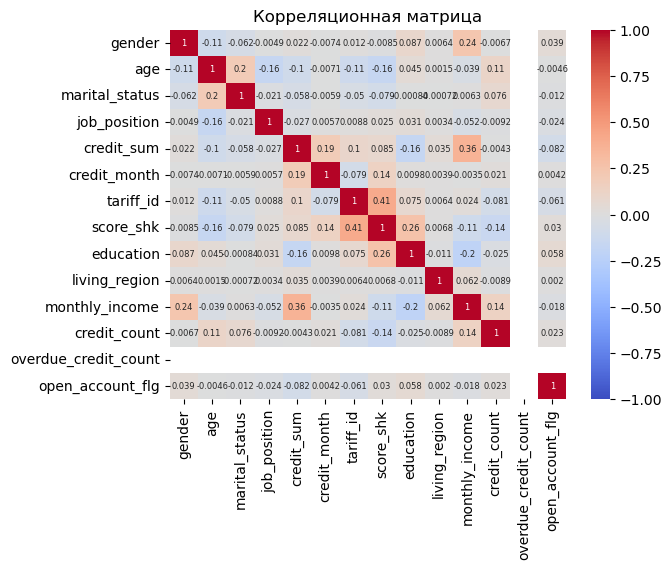

In [ ]:
#Корреляция
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap='coolwarm', annot_kws={"size": 6}, annot=True, vmin=-1, center=0)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
#Тест на нормальность распределения
# тест Шапиро-Уилк
def shapiro(columb):
    
    import scipy
    result = 'Тест Шапиро-Уилк - Отклонить гипотезу о нормальности'
    stat, p = scipy.stats.shapiro(df[columb])
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        result = "Тест Шапиро-Уилк - Принять гипотезу о нормальности"
    return result
        

In [ ]:
# Критерий согласия Пирсона
def puas(columb):
    
    import scipy
    result = 'Критерий согласия Пирсона - Отклонить гипотезу о нормальности'
    stat, p = scipy.stats.normaltest(df['education']) 
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
       print('Критерий согласия Пирсона - Принять гипотезу о нормальности')
    return result

In [ ]:
for col in df.columns:
    print(f"{col}: {shapiro(col)}")    

Statistics=0.636, p-value=0.000
gender: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.948, p-value=0.000
age: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.787, p-value=0.000
marital_status: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.338, p-value=0.000
job_position: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.888, p-value=0.000
credit_sum: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.765, p-value=0.000
credit_month: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.837, p-value=0.000
tariff_id: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.993, p-value=0.000
score_shk: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.717, p-value=0.000
education: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.956, p-value=0.000
living_region: Тест Шапиро-Уилк - Отклонить гипотезу о нормальности
Statistics=0.912, p-value=0.000
m

In [ ]:
for col in df.columns:
    print(f"{col}: {puas(col)}")

Statistics=596414.838, p-value=0.000
gender: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
age: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
marital_status: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
job_position: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
credit_sum: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
credit_month: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
tariff_id: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
score_shk: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statistics=596414.838, p-value=0.000
education: Критерий согласия Пирсона - Отклонить гипотезу о нормальности
Statist

#Выводы:
В старом коде изменили работу с датафреймом на запросы SQL, но большинство запросов при вызове выдавали ошибку TypeError: 'NoneType' object is not iterable, хоть запрос и срабатывал корректно. 
Научились немного писать SQL-запросы.